# Test 23: Z-test for correlated proportions

- UNABLE TO GET IT TO CONVERGE, PLEASE DO NOT USE
- SEE DISCUSSION UNDER "Proof by simulation..." SECTION 

## Objective

- You have some $2 \times 2$ confusion matrix
- Each column represents a response before some treatment, and each row represents a response after
- Can you conclude that there is significant difference before and after treatment?

## Assumptions

- The **same people** are questioned
- The response has only 2 outcomes
- The sample size $n$ is quite large

## Method

- I have $N$ people in the following $2 \times 2$ table, and $A,B,C,D$ are counts such that $A + B + C + D = N$

| | (Before) Yes | (Before) No |
| - | - | - |
| (After) Yes | A | B |
| (After) No | C | D |

- We want to know if there has been a significant change in the responses from before to after treatment

- Our test statistic is 
$$\begin{aligned}
    Z &= \frac{b-c}{N \sigma} \\ \\
    
    \text{where } \sigma &= \sqrt{\frac{(b+c) - \frac{(b-c)^2}{N}}{N(N-1)}}

\end{aligned}$$

- Z follows a standard normal distribution

## Example

- Problem
    - Sampled panels of potential buyers of a financial product are asked if they might buy the product. 
    - They are then shown a product advertisement of 30 seconds duration and asked again if they would buy the product. 
    - Has the advertising stimulus produced a significant change in the proportion of the panel responding ‘yes’?

| | (Before) Yes | (Before) No |
| - | - | - |
| (After) Yes | 30 | 15 |
| (After) No | 9 | 51 |

In [1]:
a = 38
b = 5
c = 3
d = 59
N = a+b+c+d

sigma = (
    ((b+c) - (((b-c)**2)/N)) /
    (N * (N-1))
)**0.5

## Do not reject null that the alues are equal
Z = (b-c)/(N * sigma)
Z

0.7054131098174972

## Proof by simulation that test statistic is Gaussian

**NOTE**

- As of 20240429, I have **not** been able to show that the test statistic is actually Gaussian
- At best, it has the bell curve shape, but does not converge to a Gaussian because there is no theoretical bound on the values that can be taken by $a,b,c,d$
- This is the case regardless of how large the sample is
- Therefore, be very careful when using this

In [2]:
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def get_mostly_no_change(n_total):
    rand = np.random.randint(20,40)
    a = d = n_total//2.5
    b = np.random.randint(1, n_total-a-d)
    c = n_total - a - b - d
    assert a+b+c+d == n_total
    return a, b, c, d

def get_random_change(n_total):
    a,b,c = np.random.randint(450, 550, 3)
    d = n_total - a - b - c
    # print(a,b,c,d)
    assert a+b+c+d == n_total
    return a, b, c, d

def get_test_statistic(abcd_tup):
    a,b,c,d = abcd_tup
    N_TOTAL = a+b+c+d
    # N_TOTAL = np.random.randint(1000,1001,1)[0]
    # a, b, c, d = get_random_change(N_TOTAL)
    # a, b, c, d = get_mostly_no_change(N_TOTAL)
    
    sigma = (
        ((b+c) - ((b-c)**2/N_TOTAL)) /
        (N_TOTAL * (N_TOTAL - 1))
    )**0.5

    Z = (b-c) / (N_TOTAL * sigma)  # Corrected N to N_TOTAL
    return Z

In [29]:
def get_all_combinations_summing_to_n(n, num_features):
    if num_features == 1:
        yield (n,)
        return
    for val in range(1, n + 1):
        for result in get_all_combinations_summing_to_n(n - val, num_features - 1):
            yield (val,) + result

combinations = get_all_combinations_summing_to_n(500, 4)

In [30]:
import polars as pl

list_of_arrays = np.array([
    np.array((combi[0],combi[1],combi[2],combi[3],get_test_statistic(combi)))
    for combi in combinations
])

df = (
    pl.DataFrame(list_of_arrays, schema=['a','b','c','d','test_statistic'])
    # .sort(['a','b','c','d'])
    # .sort('test_statistic', descending=True)
)
# display(df.head())
# display(df.tail())

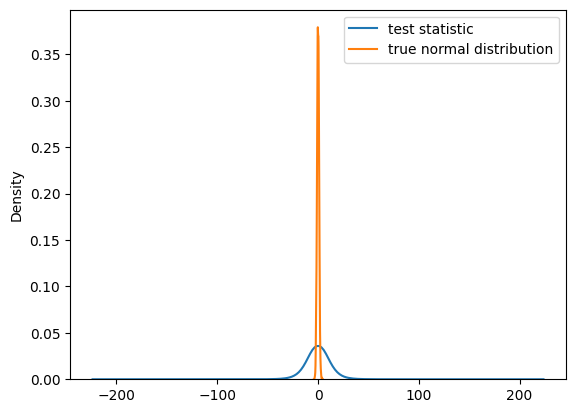

In [34]:
sns.kdeplot(df['test_statistic'], label='test statistic')
sns.kdeplot(np.random.normal(0,1,3_000), label='true normal distribution')
plt.legend()

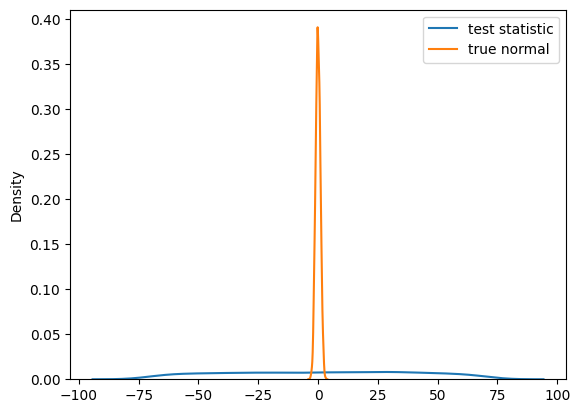

In [159]:
test_statistic_distribution = [get_test_statistic() for _ in range(3_000)]
true_normal_distribution = np.random.normal(0,1,3_000)
sns.kdeplot(test_statistic_distribution, label='test statistic')
sns.kdeplot(true_normal_distribution, label='true normal')
plt.legend()